heat budget

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd

In [2]:
import cosima_cookbook as cc

In [3]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments.db')

122 	sw_heat 	penetrative shortwave heating 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

127 	temp 	Conservative temperature 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

128 	temp_advection 	cp*rho*dzt*advection tendency 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

129 	temp_eta_smooth 	surface smoother for temp 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

130 	temp_global_ave 	Global mean temp in liquid seawater 	1 monthly 	output104/ocean/ocean_scalar.nc 	6 	2890-01-01 00:00:00 	2950-01-01 00:00:00

131 	temp_nonlocal_KPP 	cp*rho*dzt*nonlocal tendency from KPP 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

132 	temp_rivermix 	cp*rivermix*rho_dzt*temp 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

133 	temp_sigma_diff 	thk wghtd sigma-diffusion heating 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

134 	temp_submeso 	rho*dzt*cp*submesoscale tendency (heating) 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

135 	temp_surface_ave 	Global mass weighted mean surface temp in liqu... 	1 monthly 	output104/ocean/ocean_scalar.nc 	6 	2890-01-01 00:00:00 	2950-01-01 00:00:00

136 	temp_tendency 	time tendency for tracer Conservative temperature 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

137 	temp_vdiffuse_diff_cbt 	vert diffusion of heat due to diff_cbt 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

138 	temp_vdiffuse_diff_cbt_conv 	vert diffusion of heat due to diff_cbt_conv 	1 monthly 	output104/ocean/ocean_heat.nc 	4 	2910-01-01 00:00:00 	2950-01-01 00:00:00

139 	temp_vdiffuse_k33 	vert diffusion of heat due to K33 from neutral... 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

140 	temp_vdiffuse_sbc 	vert diffusion of heat due to surface flux 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

51 	frazil_3d 	ocn frazil heat flux over time step 	1 monthly 	output104/ocean/ocean_heat.nc 	5 	2900-01-01 00:00:00 	2950-01-01 00:00:00

In [43]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
temp_tendency_warm = cc.querying.getvar(expt, 'temp_tendency', session, ncfile = 'ocean_heat.nc')
area_t_warm = cc.querying.getvar(expt, 'area_t', session, ncfile = 'ocean_grid.nc', n=-1)
dzt_warm = cc.querying.getvar(expt, 'dzt', session, ncfile = 'ocean_heat.nc')

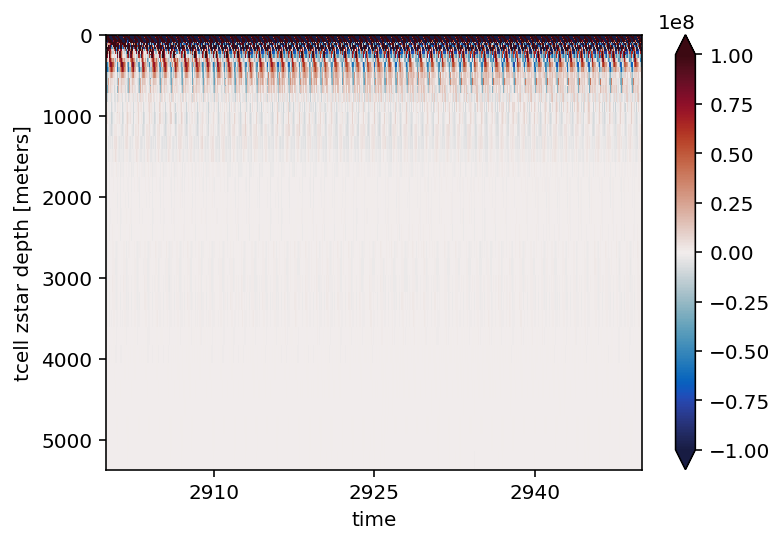

In [45]:
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'time', y = 'st_ocean', yincrease = False)

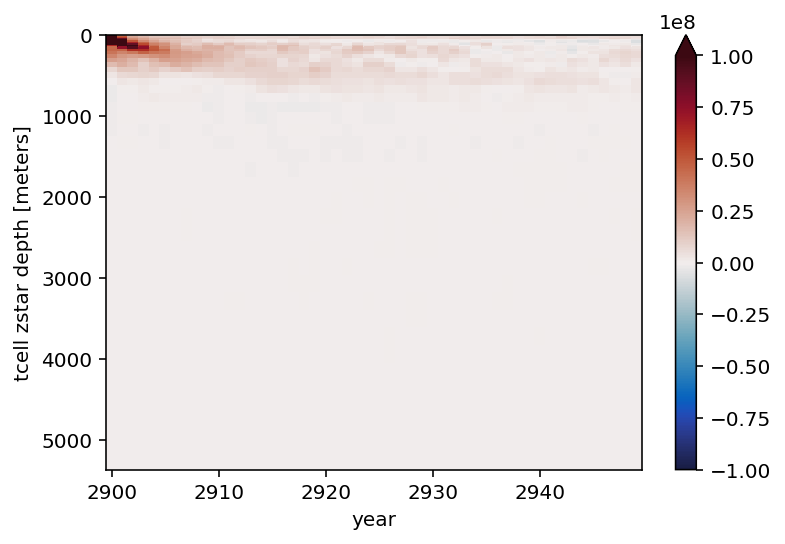

In [46]:
((temp_tendency_warm*area_t_warm).sum('xt_ocean').sum('yt_ocean')/dzt_warm.sum('xt_ocean').sum('yt_ocean')).groupby('time.year').mean('time').plot(vmin = -1e8, vmax = 1e8, cmap = cm.cm.balance, x= 'year', y = 'st_ocean', yincrease = False)

In [36]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
cc.querying.get_variables(session, experiment='1deg_jra55_ryf_RCPwarmhumid', frequency='static')

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
0,area_t,tracer cell area,static,output104/ocean/ocean_grid.nc,6,2900-01-01 00:00:00,2950-01-01 00:00:00
1,area_u,velocity cell area,static,output104/ocean/ocean_grid.nc,6,2900-01-01 00:00:00,2950-01-01 00:00:00
2,drag_coeff,Dimensionless bottom drag coefficient,static,output104/ocean/ocean_grid.nc,6,2900-01-01 00:00:00,2950-01-01 00:00:00
3,dxt,ocean dxt on t-cells,static,output104/ocean/ocean_grid.nc,6,2900-01-01 00:00:00,2950-01-01 00:00:00
4,dxu,ocean dxu on u-cells,static,output104/ocean/ocean_grid.nc,6,2900-01-01 00:00:00,2950-01-01 00:00:00
5,dyt,ocean dyt on t-cells,static,output104/ocean/ocean_grid.nc,6,2900-01-01 00:00:00,2950-01-01 00:00:00
6,dyu,ocean dyu on u-cells,static,output104/ocean/ocean_grid.nc,6,2900-01-01 00:00:00,2950-01-01 00:00:00
7,geolat_c,uv latitude,static,output104/ocean/ocean_grid.nc,6,2900-01-01 00:00:00,2950-01-01 00:00:00
8,geolat_t,tracer latitude,static,output104/ocean/ocean_grid.nc,6,2900-01-01 00:00:00,2950-01-01 00:00:00
9,geolon_c,uv longitude,static,output104/ocean/ocean_grid.nc,6,2900-01-01 00:00:00,2950-01-01 00:00:00
